In [1]:
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

In [3]:
import matplotlib

In [4]:
%matplotlib inline

In [8]:
'''
twoW 0
threeFourW 1
fivePlusW 2
'''
import numpy as np
from PIL import Image
import random

video = "Aundh" #file name of npz
mode = "test"
file_name = "demo.npz"
to_stack = False

# Let's define a dictionary that maps the different classes we have to numbers

dict = {'twoW':0, 'threeFourW':1, 'fivePlusW':2}
for vehicle in sorted(dict):
	#vehicle = "twowheeler"
	
	count = 0
	arr_stack = np.zeros((1, 50, 50, 3))
	y = dict[vehicle] * np.ones((1, 1))
	s = np.array([dict[vehicle]])
	s = s[np.newaxis, :]
    

    

	for i in range(100):
		path = "/Users/jaideepkhare/Documents/neural-networks/vehicle-detection/images/" 
		#path = "/home/chinmays/win/Users/Chinmay/Documents/vehicleClassification_Data/Dataset/" + video + "/" + "resized/" + vehicle + "/"
		#img_path = path + video + "_" + vehicle + "_" + str(i) + ".jpg"
		img_path = path + str(i) + ".jpg"	
		try:	
			img = Image.open(img_path)
			if count == 0:
				arr = np.array(img)
				arr_stack[0, :, :, :] = arr
				count = 1
			else: 
				arr = np.array(img)
				arr_stack = np.concatenate((arr_stack, arr[np.newaxis, ...]), axis = 0)
				y = np.concatenate((y, s), axis = 0)
				# print arr_stack.shape, s
		except IOError:
			print ("Error")

	if to_stack:
		arr_test = np.load(file_name)
		arr_stack = np.concatenate((arr_stack, arr_test['a']), axis = 0)
		y = np.concatenate((y, arr_test['b']), axis = 0)

	np.savez_compressed(video, a = arr_stack, b = y)
	to_stack = True
arr_test = np.load(file_name)
# print 'ff', arr_test['a'].shape, arr_test['b'].shape



FileNotFoundError: [Errno 2] No such file or directory: 'demo.npz'

In [ ]:
'''
Training Code
Save model after compiling it, in case you have to press ^C during the execution of fit function.
'''

from __future__ import print_function
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.models import model_from_json
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
#from keras.optimizers import SGD
from keras.utils import np_utils
import numpy
import matplotlib.pyplot as plt
from keras.regularizers import l2
from keras.callbacks import ModelCheckpoint

batch_size = 32
nb_classes = 3
nb_epoch = 300
data_augmentation = True

img_rows, img_cols = 50, 50
img_channels = 3

arr = numpy.load("trainAundh.npz")
X_train = 255 - arr['a']
y_train = arr['b']
Y_train = np_utils.to_categorical(y_train, nb_classes)

arr = numpy.load("testAundh.npz")
X_test = 255 - arr['a']
y_test = arr['b']
Y_test = np_utils.to_categorical(y_test, nb_classes)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
X_train -= 0.5
X_test -= 0.5

print(X_train.shape, X_test.shape)

model = Sequential()

model.add(Convolution2D(32, 3, 3, border_mode='same',
                        input_shape=(img_rows, img_cols, img_channels)))
model.add(Activation('relu'))
model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Convolution2D(64, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Convolution2D(128, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(128, 3, 3, border_mode='same'))
model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.75))

model.add(Convolution2D(128, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(128, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.75))

model.add(Flatten())
model.add(Dense(512, W_regularizer=l2(0.1)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes, W_regularizer=l2(0.1)))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#HERE: Save model after compiling it, in case you have to press ^C during the execution of fit function.
model_json = model.to_json()
with open("modelAundh.json", "w") as json_file:
        json_file.write(model_json)

filename = "modelAundh.h5"
checkpoint = ModelCheckpoint(filename, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callback_list = [checkpoint]

model.fit(X_train, Y_train,
          batch_size=batch_size,
	  callbacks=callback_list,
          nb_epoch=nb_epoch,
          validation_data=(X_test, Y_test),
          shuffle=True)


In [ ]:
'''
Code to check accuracies of trained models on any dataset.
'''
from __future__ import print_function
from keras.models import Sequential
from keras.models import model_from_json
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils import np_utils
import numpy
import matplotlib.pyplot as plt


arr = numpy.load("trainAundh.npz")
X_train = 255 - arr['a']
y_train = arr['b']

#Load the dataset for which you want to get the accuracy.
arr = numpy.load("testAundh.npz")
X_test = 255 - arr['a']
y_test = arr['b']
X_display = numpy.copy(X_test)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
X_train -= 0.5
X_test -= 0.5

path = '../data/'
model_name = 'modelAundh.json'

json_file = open(model_name, 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.compile(loss='categorical_crossentropy',
	      optimizer='adam',
	      metrics=['accuracy'])
print("CNN Loaded")
loaded_model.summary()
#Iterate over all the weights, run a forward pass, check accuracy
for i in range(1, 6):
	weights_name = 'modelAundh.h5'
	loaded_model.load_weights(weights_name)
	all_predictions = loaded_model.predict(X_test, batch_size = 32, verbose = 0) #Gives class probabilities
	all_predictions = numpy.argmax(all_predictions, axis = 1) #Finds max probability. That is the output class of the image.
	all_predictions = all_predictions[:, numpy.newaxis] #Reshape to y_test.shape
	error = all_predictions == y_test #Find correctly classified images
	acc = float(numpy.sum(error))
	acc /= y_test.shape[0]
	acc *= 100
	print('accuracy', acc)
	


/Users/jaideepkhare/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/Users/jaideepkhare/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/jaideepkhare/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/jaideepkhare/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/jaideepkhare/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/jaideepkhare/anaconda3/lib/python3.6/site-packages/ip

X_test (1998, 50, 50, 3)
y_test (1998, 1)
(1998, 50, 50, 3)
(1945, 50, 50, 3)
CNN Loaded
predictions [1 1 1 1 2 2 2 2 1 2]
(10, 1) (1998, 1)
10
threeFourW detected


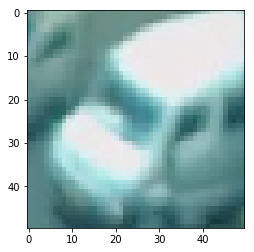

threeFourW detected


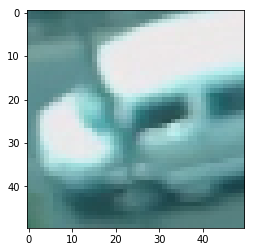

threeFourW detected


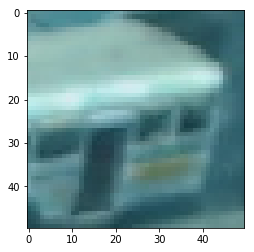

threeFourW detected


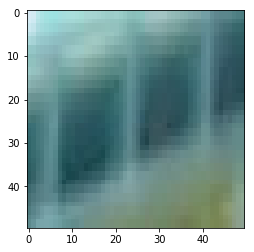

fivePlusW detected


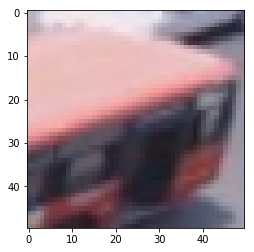

fivePlusW detected


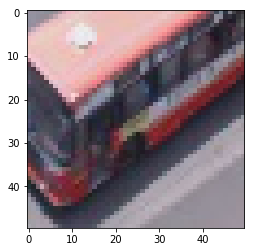

fivePlusW detected


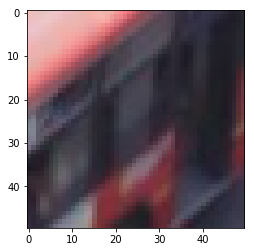

fivePlusW detected


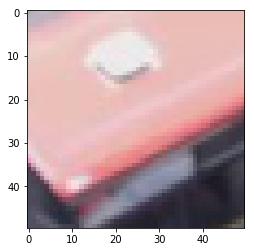

threeFourW detected


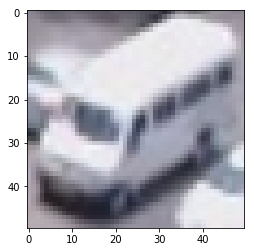

fivePlusW detected


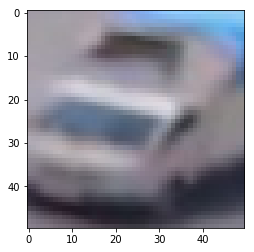

accuracy 93.69369369369369


In [10]:
# Display Image and its class, optionally display accuracy.

from __future__ import print_function
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.models import model_from_json
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD
from keras.utils import np_utils
import numpy
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt
from PIL import Image

def decode_predictions(predictions, images):
	
	# Function to display image and its class.
		
	dict_map = {0:'twoW', 1:'threeFourW', 2:'fivePlusW'}
	nImages = predictions.shape[0]
	print (nImages)
	for i in range(nImages):
		print(dict_map[predictions[i]] + " detected")
		plt.imshow(Image.fromarray(images[i]))
		plt.show()

arr = numpy.load("trainAundh.npz")
X_train = 255 - arr['a']
y_train = arr['b']

#Change the file name if you want to load any other dataset.
arr = numpy.load("testAundh.npz")
X_test = 255 - arr['a']
X_display = arr['a']
print('X_test', X_test.shape)
y_test = arr['b']
print('y_test', y_test.shape)


X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
X_train -= 0.5
X_test -= 0.5

print(X_test.shape)
print(X_train.shape)
json_file = open('modelAundh.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

loaded_model.load_weights("modelAundh.h5")
print("CNN Loaded")

loaded_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#Uncomment the block below to display images and its class

rng = numpy.arange(1988, 1998)
X_toPredict = X_test[rng, :, :, :]

predictions = loaded_model.predict(X_toPredict, batch_size = 32, verbose = 0)
predictions = numpy.argmax(predictions, axis = 1)
print('predictions', predictions)
print(predictions[:, numpy.newaxis].shape, y_test.shape)
decode_predictions(predictions, X_display[rng, :, :, :])


#Checks the accuracy on the curent test dataset, by using the method described in get_accuracy.py
all_predictions = loaded_model.predict(X_test, batch_size = 32, verbose = 0)
all_predictions = numpy.argmax(all_predictions, axis = 1)
all_predictions = all_predictions[:, numpy.newaxis]
error = all_predictions == y_test
acc = float(numpy.sum(error))
acc /= y_test.shape[0]
acc *= 100
print('accuracy', acc)

